In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

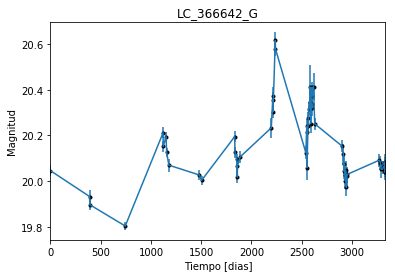

In [2]:
data = np.genfromtxt('LC_366642_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_366642_G')
plt.savefig("LC_366642_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

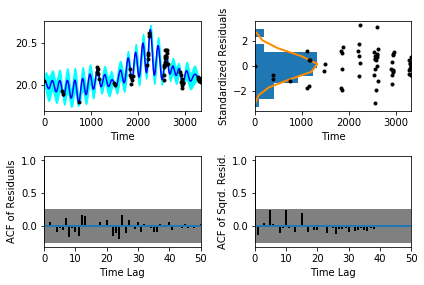

In [5]:
sample.assess_fit()

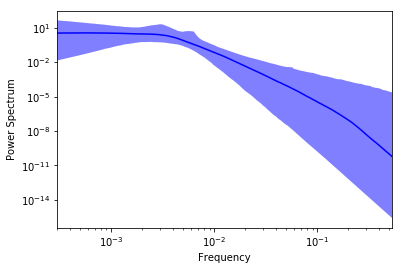

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

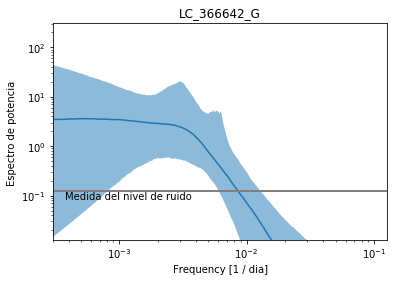

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_366642_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_366642_G')

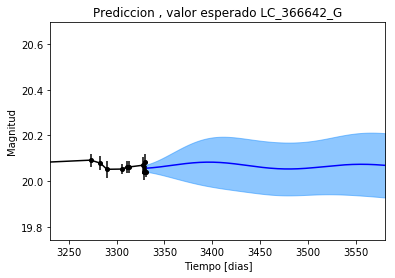

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_366642_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_366642_G')

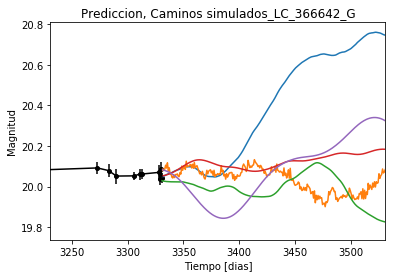

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_366642_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


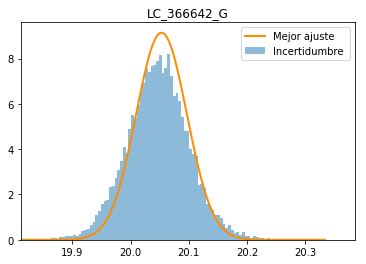

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_366642_G')
plt.savefig("Mejor_ajuste_LC_366642_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_366642_G')

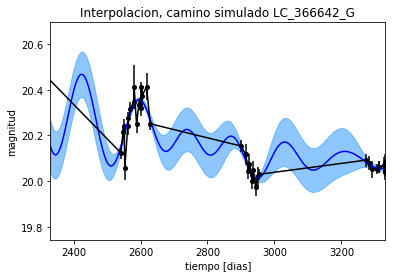

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_G')

Text(0.5,1,'Interpolacion, camino simulado LC_366642_G')

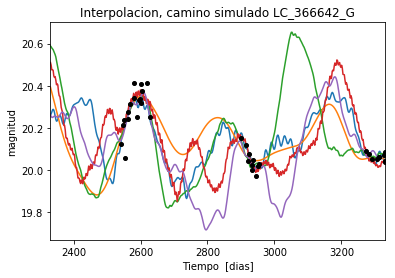

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 693.540211951
Median: 0.0065284388614
Standard deviation: 0.185462455251
68% credibility interval: [ 0.00077563  0.13117314]
95% credibility interval: [  3.42977505e-04   7.52444342e-01]
99% credibility interval: [  3.10588978e-04   1.00217169e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 325.198288869
Median: 0.00351374044892
Standard deviation: 0.101033249655
68% credibility interval: [ 0.00069593  0.04015575]
95% credibility interval: [ 0.00033865  0.33743606]
99% credibility interval: [  3.10586067e-04   7.15035378e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1343.14810847
Median: 0.00695437660676
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 756.558400894
Median: 101.864754072
Standard deviation: 1.80994766317
68% credibility interval: [  99.91717459  103.22296999]
95% credibility interval: [  97.44156087  104.79942928]
99% credibility interval: [  95.60109166  106.03311661]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 823.359138622
Median: 0.401092312256
Standard deviation: 2.15241211663
68% credibility interval: [ 0.05158484  3.21266764]
95% credibility interval: [ 0.01576383  7.43680026]
99% credibility interval: [  9.95788835e-03   1.04852814e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1060.17148132
Median: 0.562392474093
Standard deviation: 10.3899603833
68% credibility interval: [  0.0185383   12.32310753]
95% credibility interval: [  1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2970.76536579
Median: 3.07325680325e-41
Standard deviation: 5.79808682412e+115
68% credibility interval: [  4.34678012e-97   1.48562861e-07]
95% credibility interval: [  5.28320583e-147   1.17363830e+059]
99% credibility interval: [  6.42724546e-154   7.73169882e+102]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2713.66349067
Median: 20.1074660577
Standard deviation: 0.0703099997503
68% credibility interval: [ 20.04289821  20.16791228]
95% credibility interval: [ 19.96208205  20.23709044]
99% credibility interval: [ 19.87904551  20.30879355]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 925.591743275
Median: 0.0352332682814
Standard deviation: 0.277474657702
68% credibility interval: [ 0.          0.49241367]
95% credibility interval: [ 0.          0.96215056]
99% credibility interval: [ 0.          1.05428327]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 925.591743275
Median: 0.0352332682814
Standard deviation: 0.277474657702
68% credibility interval: [ 0.          0.49241367]
95% credibility interval: [ 0.          0.96215056]
99% credibility interval: [ 0.          1.05428327]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1111.31966611
Median: 0.0
Standard deviation: 0.00175997219912
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 756.558400894
Median: 101.864754072
Standard deviation: 1.80994766317
68% credibility interval: [  99.91717459  103.22296999]
95% credibility interval: [  97.44156087  104.79942928]
99% credibility interval: [  95.60109166  106.03311661]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1668.64689943
Median: 0.0383020236223
Standard deviation: 0.025454690358
68% credibility interval: [ 0.02520772  0.06389221]
95% credibility interval: [ 0.01789975  0.10882339]
99% credibility interval: [ 0.01510685  0.16334606]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1971.46075786
Median: 1.1719403363
Standard deviation: 0.198774917171
68% credibility interval: [ 0.99728508  1.38523347]
95% credibility interval: [ 0.85369997  1.61938547]
99% credibility interval: [ 0.76655958  1.80990221]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2191.19971472
Median: 0.000458683619503
Standard deviation: 0.110792884909
68% credibility interval: [  2.91029030e-06   1.64627072e-02]
95% credibility interval: [  8.49163904e-64   1.42911076e-01]
99% credibility interval: [  1.68428043e-108   6.55325890e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 693.540211951
Median: (-0.0410193911328-0.18886739556j)
Standard deviation: 2.09700787651
68% credibility interval: [-0.82418514-1.28686575j -0.00487344-0.04470717j]
95% credibility interval: [ -4.72774724e+00+0.j          -2.15499122e-03-5.73878544j]
99% credibility interval: [ -6.29683046e+00+0.j          -1.95148811e-03-4.63514486j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 325.198288869
Median: (-0.0220774823619+0.365954301644j)
Standard deviation: 1.8554013565
68% credibility interval: [-0.25230601+1.63464013j -0.00437263+4.41440317j]
95% credibility interval: [-2.12017330+6.2993015j -0.00212782+0.040458j ]
99% credibility interval: [ -4.49269978e+00+3.49259601j  -1.95146981e-03+4.61387007j]
Posterior summar